<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/ML_class_regression_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.linear_model as linear_module

In [ ]:
#@title The description of the data.
import urllib
desc_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names'
file = urllib.request.urlopen(desc_file)
for line in file:
  decoded_line = line.decode("utf-8")
  print(decoded_line, end='')

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [ ]:
#@title Read the data as CSV file.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(url, header=None, sep='\s+')

In [ ]:
df.shape

(398, 9)

In [ ]:
 df.columns = ["mpg", "cylinders", "displacement", "horsepower", 
                   "weight", "acceleration", "year", "origin", "name"]

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df.horsepower = pd.to_numeric(df['horsepower'],errors='coerce')

In [ ]:
df = df.dropna()

In [ ]:
df.origin.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
       2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1,

First let us see if number of cylinders is correlated with the mpg.

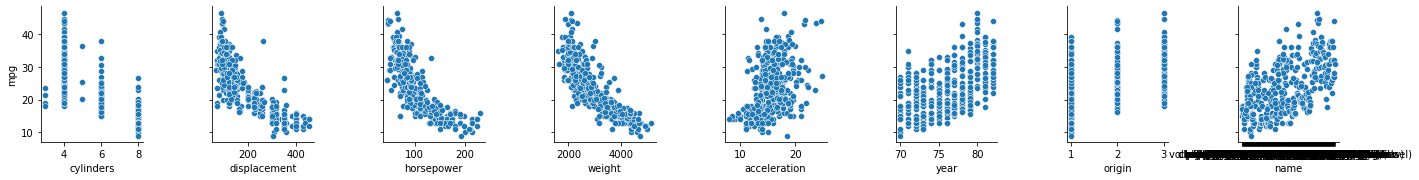

In [ ]:
sns.pairplot(df, y_vars="mpg", x_vars=["cylinders", "displacement", "horsepower", 
                   "weight", "acceleration", "year", "origin", "name"])

## mpg vs. cylinders

In [ ]:
X = df[['mpg']]
Y = df[['cylinders']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [9.45653023]
slope [[-0.16994819]]


In [ ]:
reg.coef_.squeeze()

array(-0.16994819)

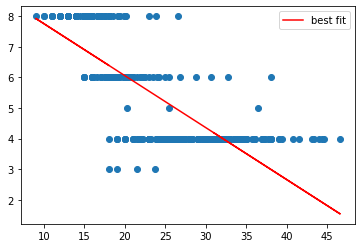

In [ ]:
plt.pyplot.scatter(df.mpg, df.cylinders)
plt.pyplot.plot(df.mpg, df.mpg*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

## Linear regression for Horsepower

First we will see how well the regression works.  We will then look at the prediction using the model.

In [ ]:
df[['horsepower', 'displacement']]

,horsepower,displacement
0,130.0,307.0
1,165.0,350.0
2,150.0,318.0
3,150.0,304.0
4,140.0,302.0
...,...,...
393,86.0,140.0
394,52.0,97.0
395,84.0,135.0
396,79.0,120.0


In [ ]:
Y = df[['mpg']]
X = df[['horsepower']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [39.93586102]
slope [[-0.15784473]]


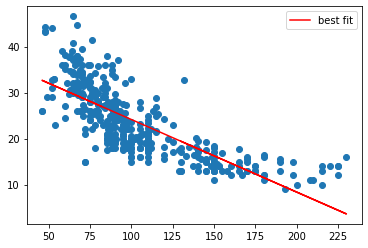

In [ ]:
plt.pyplot.scatter(df.horsepower, df.mpg)
plt.pyplot.plot(df.horsepower, df.horsepower*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

## Prediction

Training and test data split is done by calling the `train_test_split` method.  This method randomizes the dataset and selects a fraction sepcified by the `test_size` parameter.

In [ ]:
from sklearn.model_selection import train_test_split
# Split X and Y into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape) 
print("y_test shape: ",y_test.shape)


X_train shape:  (294, 1)
y_train shape:  (294, 1)
X_test shape:  (98, 1)
y_test shape:  (98, 1)


### Training

We say we want a linear model by calling `linear_module.LinearRegression()`. We will train the model using `fit()` method.

The library will try to get the coefficients for the equation.
$\hat{y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2$

In [ ]:
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)


### Training error

First we will check the training error.  We try to predict the `y` values of the training set and compare it to `y_train`.

This is only for demonstration.  If the training error is very low but the test error is high, then we have overfitting for the training data.

In [ ]:
y_train_predict = reg.predict(X_train)


First compare the values visually.

In [ ]:
df_train_comparison = pd.DataFrame({"y_train" : y_train.mpg.values, "predicted" : y_train_predict.flatten() })

In [ ]:
df_train_comparison

,y_train,predicted
0,20.8,26.136357
1,16.9,15.130304
2,20.0,25.664669
3,26.5,28.180338
4,18.0,23.777917
...,...,...
289,28.0,27.708650
290,19.4,25.350210
291,13.0,19.061037
292,30.5,29.595402


In [ ]:
from sklearn.metrics import mean_squared_error
import math

regression_train_mse = mean_squared_error(y_train_predict, y_train)
print("HorsePower training error"," ",math.sqrt(regression_train_mse))

HorsePower training error   4.743788859546067


### Test error

In [ ]:
y_predict = reg.predict(X_test)


First let us compare the values visually.




In [ ]:
df_comparison = pd.DataFrame({"y_test" : y_test.mpg.values, "predicted" : y_predict.flatten() })

In [ ]:
df_comparison

,y_test,predicted
0,23.0,24.249605
1,29.0,27.708650
2,32.4,27.708650
3,19.0,21.891165
4,38.0,28.966485
...,...,...
93,11.0,6.482691
94,12.0,8.369443
95,26.8,21.419477
96,13.0,17.488744


In [ ]:
from sklearn.metrics import mean_squared_error
import math

regression_test_mse = mean_squared_error(y_predict, y_test)
print("HorsePower test error"," ",math.sqrt(regression_test_mse))

HorsePower test error   5.368056138365668


## Error measures

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,  y_train_predict.flatten())

0.6067379548039893

In [ ]:
r2_score(y_test, y_predict)

0.5960022378825887

## Summary

What we have seen so far is that less than 10 lines of code (+5 import statements), we have been able to:
- split the data into training and test sets
- train the model on the training set
- check the training error and test MSE/RSE errors.
- get the r2 score for the fit.


In [ ]:
#@title  All the regression code in one place

# test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.5960022378825887

## Exercises

- Repeat the above for one or two more individual predictors of your choice.
- How will we train for multiple predictors?